In [1]:
from pyiga.hierarchical import *
from pyiga import bspline, geometry, utils, vform
from pyiga.vis import *

from numpy.random import rand
def create_example_hspace(p, dim, n0, disparity=np.inf, truncate=False, num_levels=3):
    bdspecs = [(0,0), (0,1), (1,0), (1,1)] if dim==2 else [(0,0),(0,1)]
    hs = HSpace(dim * (bspline.make_knots(p, 0.0, 1.0, n0),),
            truncate=truncate, disparity=disparity, bdspecs=bdspecs)
#     perform local refinement
    delta = 0.5
    for lv in range(num_levels):
        hs.refine_region(lv, lambda *X: min(X) > 1 - delta**(lv+1))
    return hs


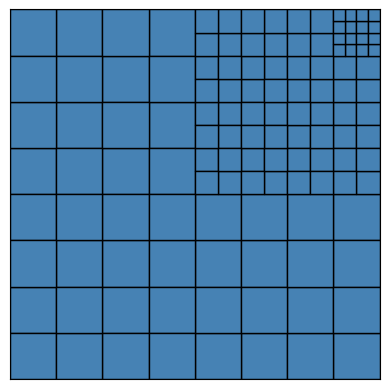

In [2]:
hs = create_example_hspace(p=3, dim=2, n0=4, disparity=1, num_levels=3)
plot_hierarchical_mesh(hs, levelwise=False)


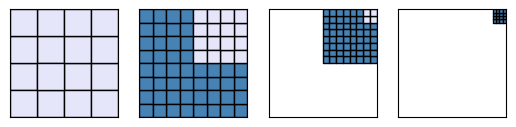

In [3]:
plot_hierarchical_mesh(hs, levelwise=True)

3


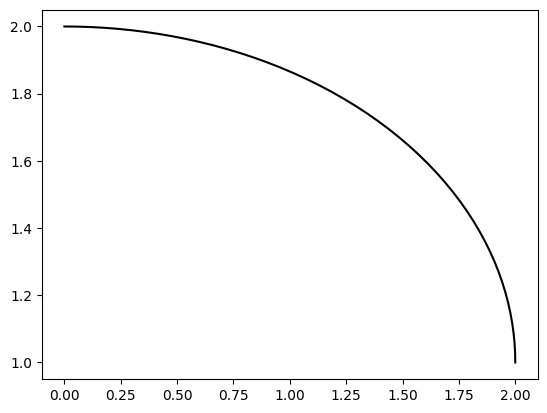

In [47]:
from pyiga.geometry import *
from pyiga import approx, bspline
kv = bspline.make_knots(2, 0.0, 1.0, 1)
print(kv.numdofs)

r = 2.0
# construct quarter circle using NURBS
coeffs = np.array([
        [  r, 1.0, 1.0],
        [  r,   r, 1.0 / np.sqrt(2.0)],
        [0.0,   r, 1.0]])

grid = (np.linspace(0.0, 1.0, 20),)

nurbs = NurbsFunc((kv,), coeffs.copy(), weights=None)
vals = nurbs.grid_eval(grid)
plot_geo(nurbs, grid=grid,res=50, linewidth=None, color='black')

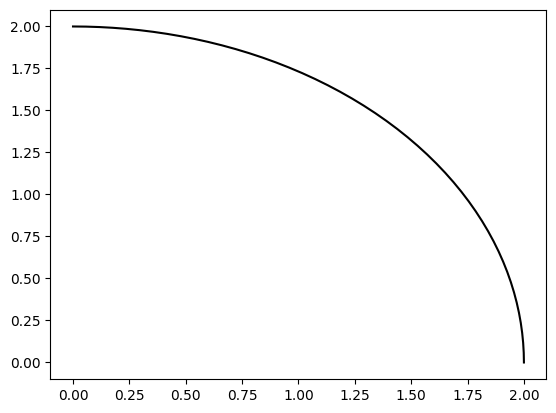

In [11]:
nurbs = NurbsFunc((kv,), coeffs[:, :2], weights=coeffs[:, -1])
vals = nurbs.grid_eval(grid)
plot_geo(nurbs, grid=grid,res=50, linewidth=None, color='black')

In [15]:
Gy = circular_arc(np.pi / 2)                    # 2D function
kv = bspline.make_knots(2, 0.0, 1.0, 1)
Gx = NurbsFunc(kv, [0,.5,1], [1,1.0/3.0,1])     # scalar function
G = tensor_product(Gy, Gx)
plot_geo(G, grid=10,res=50, linewidth=None, color='black')

AssertionError: Can only plot 2D geometries